### Libraries

In [1]:
# Standard libraries
import os
import pickle

# Numerical and data manipulation libraries
import numpy as np

# Image processing libraries
import cv2

# Machine learning libraries
import tensorflow as tf

# Visualization
import matplotlib.pyplot as plt

# Custom module
from predictor import FaceRecognizer

### Paths

In [2]:
face_recognizer_path = "face_recognizer.pkl"
meta_learner_path = "ensemble_meta_learner.h5"
test_dir = "artifacts/extracted_faces/test"
sample_image_path = "artifacts/ad6bbc5397f5af9fe92908c52533da2e.webp"  # random picture of virat kohili from web

In [3]:
labels = os.listdir(test_dir)
labels = sorted(labels)

### Load face recognizer

In [4]:
# Create an instance of the pipeline
meta_learner = tf.keras.models.load_model(meta_learner_path)
face_recognizer = FaceRecognizer(meta_learner)

2024-06-06 02:29:37.337103: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-06 02:29:37.337128: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-06 02:29:37.337136: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-06 02:29:37.337154: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-06 02:29:37.337168: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Volumes/T7/face_recognition/faceenv/lib/python3.11/site-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a laye

## Predict

In [5]:
# Load Image
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
predicted_prop = face_recognizer.predict(image)
prediction = np.argmax(predicted_prop,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


2024-06-06 02:29:40.663314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
(160, 160, 3)
features for facenet : (1, 160, 160, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
features for openface :  (1, 96, 96, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Features for training : (1, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [7]:
predicted_identity = labels[prediction[0]]

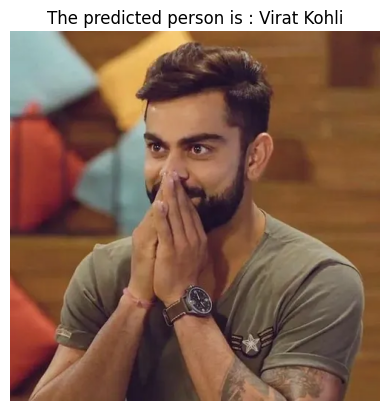

In [8]:
plt.imshow(image)
plt.title("The predicted person is : {}".format(predicted_identity))
plt.axis("off")
plt.show()